## Skin Cancer Detection using Machine Learning

In [ ]:
# <==== Importing Neccesary libraries ===>
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [ ]:
# <==== Loading the csv file containing labels===>
df =pd.read_csv('ISIC_2019_Training_GroundTruth.csv')
df.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Analysis

In [ ]:
df.shape #25331 rows and 10 columns

(25331, 10)

In [ ]:
df.info() #basic information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
image    25331 non-null object
MEL      25331 non-null float64
NV       25331 non-null float64
BCC      25331 non-null float64
AK       25331 non-null float64
BKL      25331 non-null float64
DF       25331 non-null float64
VASC     25331 non-null float64
SCC      25331 non-null float64
UNK      25331 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [ ]:
df.describe() # descriptive statistics

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
df.isnull().sum() # checing for missing values

image    0
MEL      0
NV       0
BCC      0
AK       0
BKL      0
DF       0
VASC     0
SCC      0
UNK      0
dtype: int64

In [ ]:
# Classifying only 3 classes: Melanoma, Nevus, and BCC hence we will only take those into consideration.

In [ ]:
# Values for each class
print(df['NV'].value_counts())
print(df['BCC'].value_counts())
print(df['MEL'].value_counts())

1.0    12875
0.0    12456
Name: NV, dtype: int64
0.0    22008
1.0     3323
Name: BCC, dtype: int64
0.0    20809
1.0     4522
Name: MEL, dtype: int64


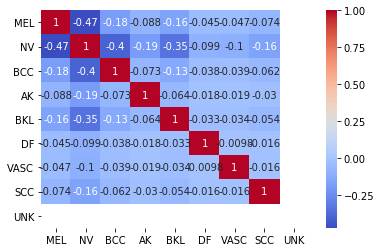

In [ ]:
# generating heatmap to see correlation among various columns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

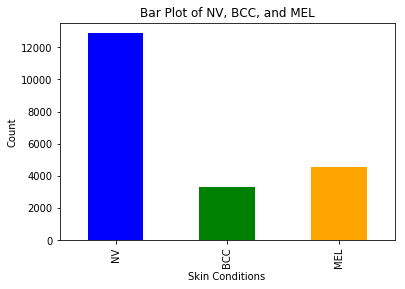

In [ ]:
# Plotting a bar plot

selected_columns = ['NV', 'BCC', 'MEL']
selected_data = df[selected_columns]
selected_data.sum().plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Bar Plot of NV, BCC, and MEL')
plt.xlabel('Skin Conditions')
plt.ylabel('Count')
plt.show()

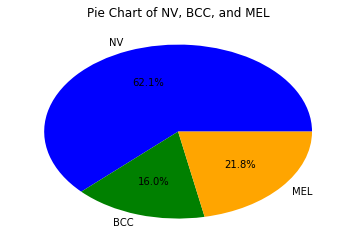

In [ ]:
# Plotting a pie chart to see percentage wise distribution

selected_columns = ['NV', 'BCC', 'MEL']
selected_data = df[selected_columns]
total_counts = selected_data.sum()
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
plt.title('Pie Chart of NV, BCC, and MEL')
plt.show()

In [ ]:
mel_lst=df[df['MEL']==1.0]['image'].tolist()
len(mel_lst)

4522

In [ ]:
df_nvl = df[df['NV']==1.0]
nvl_lst=df_nvl['image'].tolist()
len(nvl_lst)

12875

In [ ]:
df_bcc = df[df['BCC']==1.0]
bcc_lst=df_bcc['image'].tolist()
len(bcc_lst)

3323

In [ ]:
src = 'ISIC_2019_ML/ISIC_2019_Training_Input/'
m_dest = 'Desktop/ISIC_2019_ML/Melanoma/'
n_dest = 'Desktop/ISIC_2019_ML/Navus/'
b_dest = 'Desktop/ISIC_2019_ML/Bcc/'

all_img = os.listdir(src)
# Iterate over each image file in the source directory
for im in all_img:
    k=im.split('.')[0]

    # Check if the filename is in the list 'mel_lst'
    if k in mel_lst:
        f_name="melanoma_" + str(im)
        print(f_name)
        # Generate a new filename with a prefix and move the file
        shutil.move(src + im, m_dest + f_name)
    # Check if the filename is in the list 'nvl_lst'

    elif k in nvl_lst:
        f_name="nvl_" + str(im)
        print(f_name)
        # Generate a new filename with a prefix and move the file
        shutil.move(src + im, n_dest + f_name)

    # Check if the filename is in the list 'bcc_lst'
    elif k in bcc_lst:
        f_name="bcc_" + str(im)
        print(f_name)
        # Generate a new filename with a prefix and move the file
        shutil.move(src + im, b_dest + f_name)

nvl_ISIC_0028153.jpg
nvl_ISIC_0028154.jpg
nvl_ISIC_0028157.jpg
nvl_ISIC_0028159.jpg
nvl_ISIC_0028160.jpg
nvl_ISIC_0028161.jpg
nvl_ISIC_0028162.jpg
nvl_ISIC_0028164.jpg
nvl_ISIC_0028166.jpg
nvl_ISIC_0028167.jpg
nvl_ISIC_0028169.jpg
nvl_ISIC_0028170.jpg
nvl_ISIC_0028171.jpg
nvl_ISIC_0028172.jpg
nvl_ISIC_0028174.jpg
nvl_ISIC_0028175.jpg
nvl_ISIC_0028176.jpg
nvl_ISIC_0028177.jpg
nvl_ISIC_0028178.jpg
nvl_ISIC_0028179.jpg
nvl_ISIC_0028181.jpg
nvl_ISIC_0028182.jpg
nvl_ISIC_0028183.jpg
nvl_ISIC_0028184.jpg
nvl_ISIC_0028185.jpg
nvl_ISIC_0028186.jpg
nvl_ISIC_0028187.jpg
nvl_ISIC_0028189.jpg
nvl_ISIC_0028191.jpg
nvl_ISIC_0028192.jpg
nvl_ISIC_0028193.jpg
nvl_ISIC_0028194.jpg
nvl_ISIC_0028195.jpg
nvl_ISIC_0028196.jpg
nvl_ISIC_0028199.jpg
nvl_ISIC_0028202.jpg
nvl_ISIC_0028203.jpg
nvl_ISIC_0028204.jpg
nvl_ISIC_0028205.jpg
nvl_ISIC_0028206.jpg
nvl_ISIC_0028207.jpg
nvl_ISIC_0028208.jpg
nvl_ISIC_0028210.jpg
nvl_ISIC_0028212.jpg
nvl_ISIC_0028213.jpg
nvl_ISIC_0028214.jpg
nvl_ISIC_0028216.jpg
nvl_ISIC_0028

nvl_ISIC_0028829.jpg
nvl_ISIC_0028831.jpg
nvl_ISIC_0028832.jpg
nvl_ISIC_0028833.jpg
nvl_ISIC_0028834.jpg
nvl_ISIC_0028835.jpg
nvl_ISIC_0028836.jpg
nvl_ISIC_0028837.jpg
nvl_ISIC_0028838.jpg
nvl_ISIC_0028839.jpg
nvl_ISIC_0028841.jpg
nvl_ISIC_0028843.jpg
nvl_ISIC_0028844.jpg
nvl_ISIC_0028845.jpg
nvl_ISIC_0028848.jpg
nvl_ISIC_0028849.jpg
nvl_ISIC_0028850.jpg
nvl_ISIC_0028851.jpg
nvl_ISIC_0028852.jpg
nvl_ISIC_0028853.jpg
nvl_ISIC_0028855.jpg
nvl_ISIC_0028857.jpg
nvl_ISIC_0028859.jpg
nvl_ISIC_0028861.jpg
nvl_ISIC_0028862.jpg
nvl_ISIC_0028863.jpg
nvl_ISIC_0028864.jpg
nvl_ISIC_0028865.jpg
nvl_ISIC_0028866.jpg
nvl_ISIC_0028867.jpg
nvl_ISIC_0028868.jpg
nvl_ISIC_0028869.jpg
nvl_ISIC_0028870.jpg
nvl_ISIC_0028873.jpg
nvl_ISIC_0028874.jpg
nvl_ISIC_0028875.jpg
nvl_ISIC_0028879.jpg
nvl_ISIC_0028882.jpg
nvl_ISIC_0028883.jpg
nvl_ISIC_0028884.jpg
nvl_ISIC_0028886.jpg
nvl_ISIC_0028887.jpg
nvl_ISIC_0028888.jpg
nvl_ISIC_0028889.jpg
nvl_ISIC_0028891.jpg
nvl_ISIC_0028892.jpg
nvl_ISIC_0028893.jpg
nvl_ISIC_0028

nvl_ISIC_0029444.jpg
nvl_ISIC_0029445.jpg
nvl_ISIC_0029446.jpg
nvl_ISIC_0029447.jpg
nvl_ISIC_0029449.jpg
nvl_ISIC_0029450.jpg
nvl_ISIC_0029451.jpg
nvl_ISIC_0029452.jpg
nvl_ISIC_0029456.jpg
nvl_ISIC_0029457.jpg
nvl_ISIC_0029458.jpg
nvl_ISIC_0029459.jpg
nvl_ISIC_0029461.jpg
nvl_ISIC_0029463.jpg
nvl_ISIC_0029465.jpg
nvl_ISIC_0029467.jpg
nvl_ISIC_0029468.jpg
nvl_ISIC_0029469.jpg
nvl_ISIC_0029470.jpg
nvl_ISIC_0029471.jpg
nvl_ISIC_0029475.jpg
nvl_ISIC_0029476.jpg
nvl_ISIC_0029477.jpg
nvl_ISIC_0029478.jpg
nvl_ISIC_0029479.jpg
nvl_ISIC_0029481.jpg
nvl_ISIC_0029482.jpg
nvl_ISIC_0029483.jpg
nvl_ISIC_0029484.jpg
nvl_ISIC_0029485.jpg
nvl_ISIC_0029487.jpg
nvl_ISIC_0029488.jpg
nvl_ISIC_0029490.jpg
nvl_ISIC_0029491.jpg
nvl_ISIC_0029492.jpg
nvl_ISIC_0029493.jpg
nvl_ISIC_0029494.jpg
nvl_ISIC_0029496.jpg
nvl_ISIC_0029497.jpg
nvl_ISIC_0029498.jpg
nvl_ISIC_0029499.jpg
nvl_ISIC_0029503.jpg
nvl_ISIC_0029504.jpg
nvl_ISIC_0029506.jpg
nvl_ISIC_0029507.jpg
nvl_ISIC_0029508.jpg
nvl_ISIC_0029509.jpg
nvl_ISIC_0029

nvl_ISIC_0030159.jpg
nvl_ISIC_0030161.jpg
nvl_ISIC_0030162.jpg
nvl_ISIC_0030163.jpg
nvl_ISIC_0030164.jpg
nvl_ISIC_0030166.jpg
nvl_ISIC_0030167.jpg
nvl_ISIC_0030168.jpg
nvl_ISIC_0030169.jpg
nvl_ISIC_0030170.jpg
nvl_ISIC_0030174.jpg
nvl_ISIC_0030176.jpg
nvl_ISIC_0030178.jpg
nvl_ISIC_0030179.jpg
nvl_ISIC_0030180.jpg
nvl_ISIC_0030182.jpg
nvl_ISIC_0030184.jpg
nvl_ISIC_0030185.jpg
nvl_ISIC_0030186.jpg
nvl_ISIC_0030190.jpg
nvl_ISIC_0030193.jpg
nvl_ISIC_0030194.jpg
nvl_ISIC_0030195.jpg
nvl_ISIC_0030196.jpg
nvl_ISIC_0030198.jpg
nvl_ISIC_0030199.jpg
nvl_ISIC_0030200.jpg
nvl_ISIC_0030201.jpg
nvl_ISIC_0030202.jpg
nvl_ISIC_0030204.jpg
nvl_ISIC_0030205.jpg
nvl_ISIC_0030206.jpg
nvl_ISIC_0030209.jpg
nvl_ISIC_0030210.jpg
nvl_ISIC_0030212.jpg
nvl_ISIC_0030213.jpg
nvl_ISIC_0030214.jpg
nvl_ISIC_0030215.jpg
nvl_ISIC_0030216.jpg
nvl_ISIC_0030217.jpg
nvl_ISIC_0030218.jpg
nvl_ISIC_0030219.jpg
nvl_ISIC_0030220.jpg
nvl_ISIC_0030221.jpg
nvl_ISIC_0030222.jpg
nvl_ISIC_0030224.jpg
nvl_ISIC_0030225.jpg
nvl_ISIC_0030

nvl_ISIC_0030873.jpg
nvl_ISIC_0030874.jpg
nvl_ISIC_0030875.jpg
nvl_ISIC_0030878.jpg
nvl_ISIC_0030879.jpg
nvl_ISIC_0030880.jpg
nvl_ISIC_0030881.jpg
nvl_ISIC_0030884.jpg
nvl_ISIC_0030885.jpg
nvl_ISIC_0030886.jpg
nvl_ISIC_0030887.jpg
nvl_ISIC_0030888.jpg
nvl_ISIC_0030889.jpg
nvl_ISIC_0030890.jpg
nvl_ISIC_0030891.jpg
nvl_ISIC_0030892.jpg
nvl_ISIC_0030894.jpg
nvl_ISIC_0030895.jpg
nvl_ISIC_0030896.jpg
nvl_ISIC_0030897.jpg
nvl_ISIC_0030899.jpg
nvl_ISIC_0030900.jpg
nvl_ISIC_0030902.jpg
nvl_ISIC_0030903.jpg
nvl_ISIC_0030904.jpg
nvl_ISIC_0030905.jpg
nvl_ISIC_0030906.jpg
nvl_ISIC_0030907.jpg
nvl_ISIC_0030908.jpg
nvl_ISIC_0030909.jpg
nvl_ISIC_0030911.jpg
nvl_ISIC_0030912.jpg
nvl_ISIC_0030913.jpg
nvl_ISIC_0030914.jpg
nvl_ISIC_0030916.jpg
nvl_ISIC_0030917.jpg
nvl_ISIC_0030918.jpg
nvl_ISIC_0030919.jpg
nvl_ISIC_0030920.jpg
nvl_ISIC_0030921.jpg
nvl_ISIC_0030922.jpg
nvl_ISIC_0030923.jpg
nvl_ISIC_0030924.jpg
nvl_ISIC_0030927.jpg
nvl_ISIC_0030928.jpg
nvl_ISIC_0030930.jpg
nvl_ISIC_0030931.jpg
nvl_ISIC_0030

nvl_ISIC_0031607.jpg
nvl_ISIC_0031608.jpg
nvl_ISIC_0031610.jpg
nvl_ISIC_0031611.jpg
nvl_ISIC_0031612.jpg
nvl_ISIC_0031613.jpg
nvl_ISIC_0031615.jpg
nvl_ISIC_0031616.jpg
nvl_ISIC_0031617.jpg
nvl_ISIC_0031618.jpg
nvl_ISIC_0031621.jpg
nvl_ISIC_0031622.jpg
nvl_ISIC_0031623.jpg
nvl_ISIC_0031625.jpg
nvl_ISIC_0031626.jpg
nvl_ISIC_0031627.jpg
nvl_ISIC_0031628.jpg
nvl_ISIC_0031629.jpg
nvl_ISIC_0031631.jpg
nvl_ISIC_0031632.jpg
nvl_ISIC_0031634.jpg
nvl_ISIC_0031635.jpg
nvl_ISIC_0031636.jpg
nvl_ISIC_0031637.jpg
nvl_ISIC_0031638.jpg
nvl_ISIC_0031641.jpg
nvl_ISIC_0031644.jpg
nvl_ISIC_0031645.jpg
nvl_ISIC_0031646.jpg
nvl_ISIC_0031647.jpg
nvl_ISIC_0031649.jpg
nvl_ISIC_0031652.jpg
nvl_ISIC_0031653.jpg
nvl_ISIC_0031654.jpg
nvl_ISIC_0031655.jpg
nvl_ISIC_0031656.jpg
nvl_ISIC_0031657.jpg
nvl_ISIC_0031658.jpg
nvl_ISIC_0031660.jpg
nvl_ISIC_0031661.jpg
nvl_ISIC_0031662.jpg
nvl_ISIC_0031663.jpg
nvl_ISIC_0031664.jpg
nvl_ISIC_0031665.jpg
nvl_ISIC_0031667.jpg
nvl_ISIC_0031668.jpg
nvl_ISIC_0031669.jpg
nvl_ISIC_0031

nvl_ISIC_0032165.jpg
nvl_ISIC_0032166.jpg
nvl_ISIC_0032167.jpg
nvl_ISIC_0032169.jpg
nvl_ISIC_0032171.jpg
nvl_ISIC_0032172.jpg
nvl_ISIC_0032175.jpg
nvl_ISIC_0032176.jpg
nvl_ISIC_0032177.jpg
nvl_ISIC_0032178.jpg
nvl_ISIC_0032180.jpg
nvl_ISIC_0032181.jpg
nvl_ISIC_0032183.jpg
nvl_ISIC_0032184.jpg
nvl_ISIC_0032186.jpg
nvl_ISIC_0032188.jpg
nvl_ISIC_0032189.jpg
nvl_ISIC_0032191.jpg
nvl_ISIC_0032193.jpg
nvl_ISIC_0032195.jpg
nvl_ISIC_0032196.jpg
nvl_ISIC_0032198.jpg
nvl_ISIC_0032201.jpg
nvl_ISIC_0032202.jpg
nvl_ISIC_0032205.jpg
nvl_ISIC_0032208.jpg
nvl_ISIC_0032209.jpg
nvl_ISIC_0032210.jpg
nvl_ISIC_0032211.jpg
nvl_ISIC_0032212.jpg
nvl_ISIC_0032213.jpg
nvl_ISIC_0032216.jpg
nvl_ISIC_0032217.jpg
nvl_ISIC_0032218.jpg
nvl_ISIC_0032221.jpg
nvl_ISIC_0032223.jpg
nvl_ISIC_0032224.jpg
nvl_ISIC_0032226.jpg
nvl_ISIC_0032227.jpg
nvl_ISIC_0032228.jpg
nvl_ISIC_0032229.jpg
nvl_ISIC_0032231.jpg
nvl_ISIC_0032233.jpg
nvl_ISIC_0032234.jpg
nvl_ISIC_0032236.jpg
nvl_ISIC_0032237.jpg
nvl_ISIC_0032239.jpg
nvl_ISIC_0032

nvl_ISIC_0032881.jpg
nvl_ISIC_0032882.jpg
nvl_ISIC_0032884.jpg
nvl_ISIC_0032885.jpg
nvl_ISIC_0032886.jpg
nvl_ISIC_0032889.jpg
nvl_ISIC_0032891.jpg
nvl_ISIC_0032893.jpg
nvl_ISIC_0032895.jpg
nvl_ISIC_0032896.jpg
nvl_ISIC_0032899.jpg
nvl_ISIC_0032900.jpg
nvl_ISIC_0032901.jpg
nvl_ISIC_0032902.jpg
nvl_ISIC_0032904.jpg
nvl_ISIC_0032905.jpg
nvl_ISIC_0032907.jpg
nvl_ISIC_0032908.jpg
nvl_ISIC_0032909.jpg
nvl_ISIC_0032910.jpg
nvl_ISIC_0032911.jpg
nvl_ISIC_0032912.jpg
nvl_ISIC_0032914.jpg
nvl_ISIC_0032916.jpg
nvl_ISIC_0032920.jpg
nvl_ISIC_0032923.jpg
nvl_ISIC_0032924.jpg
nvl_ISIC_0032926.jpg
nvl_ISIC_0032928.jpg
nvl_ISIC_0032930.jpg
nvl_ISIC_0032931.jpg
nvl_ISIC_0032933.jpg
nvl_ISIC_0032934.jpg
nvl_ISIC_0032935.jpg
nvl_ISIC_0032937.jpg
nvl_ISIC_0032939.jpg
nvl_ISIC_0032942.jpg
nvl_ISIC_0032943.jpg
nvl_ISIC_0032944.jpg
nvl_ISIC_0032945.jpg
nvl_ISIC_0032946.jpg
nvl_ISIC_0032948.jpg
nvl_ISIC_0032950.jpg
nvl_ISIC_0032951.jpg
nvl_ISIC_0032952.jpg
nvl_ISIC_0032953.jpg
nvl_ISIC_0032954.jpg
nvl_ISIC_0032

nvl_ISIC_0033702.jpg
nvl_ISIC_0033703.jpg
nvl_ISIC_0033706.jpg
nvl_ISIC_0033707.jpg
nvl_ISIC_0033711.jpg
nvl_ISIC_0033712.jpg
nvl_ISIC_0033714.jpg
nvl_ISIC_0033715.jpg
nvl_ISIC_0033718.jpg
nvl_ISIC_0033719.jpg
nvl_ISIC_0033721.jpg
nvl_ISIC_0033723.jpg
nvl_ISIC_0033724.jpg
nvl_ISIC_0033726.jpg
nvl_ISIC_0033727.jpg
nvl_ISIC_0033729.jpg
nvl_ISIC_0033731.jpg
nvl_ISIC_0033733.jpg
nvl_ISIC_0033734.jpg
nvl_ISIC_0033735.jpg
nvl_ISIC_0033737.jpg
nvl_ISIC_0033738.jpg
nvl_ISIC_0033739.jpg
nvl_ISIC_0033740.jpg
nvl_ISIC_0033741.jpg
nvl_ISIC_0033742.jpg
nvl_ISIC_0033743.jpg
nvl_ISIC_0033745.jpg
nvl_ISIC_0033746.jpg
nvl_ISIC_0033748.jpg
nvl_ISIC_0033751.jpg
nvl_ISIC_0033753.jpg
nvl_ISIC_0033755.jpg
nvl_ISIC_0033756.jpg
nvl_ISIC_0033757.jpg
nvl_ISIC_0033759.jpg
nvl_ISIC_0033760.jpg
nvl_ISIC_0033763.jpg
nvl_ISIC_0033764.jpg
nvl_ISIC_0033765.jpg
nvl_ISIC_0033766.jpg
nvl_ISIC_0033767.jpg
nvl_ISIC_0033768.jpg
nvl_ISIC_0033769.jpg
nvl_ISIC_0033771.jpg
nvl_ISIC_0033772.jpg
nvl_ISIC_0033774.jpg
nvl_ISIC_0033

nvl_ISIC_0053880.jpg
nvl_ISIC_0053881.jpg
nvl_ISIC_0053883.jpg
nvl_ISIC_0053886.jpg
nvl_ISIC_0053890.jpg
nvl_ISIC_0053894.jpg
nvl_ISIC_0053896.jpg
nvl_ISIC_0053915.jpg
nvl_ISIC_0053918.jpg
nvl_ISIC_0053920.jpg
nvl_ISIC_0053922.jpg
nvl_ISIC_0053929.jpg
nvl_ISIC_0053931.jpg
nvl_ISIC_0053937.jpg
nvl_ISIC_0053940.jpg
nvl_ISIC_0053948.jpg
nvl_ISIC_0053952.jpg
nvl_ISIC_0053959.jpg
nvl_ISIC_0053970.jpg
nvl_ISIC_0053975.jpg
nvl_ISIC_0053982.jpg
nvl_ISIC_0053983.jpg
nvl_ISIC_0053992.jpg
nvl_ISIC_0053998.jpg
nvl_ISIC_0054008.jpg
nvl_ISIC_0054012.jpg
nvl_ISIC_0054022.jpg
nvl_ISIC_0054023.jpg
nvl_ISIC_0054027.jpg
nvl_ISIC_0054039.jpg
nvl_ISIC_0054041.jpg
nvl_ISIC_0054044.jpg
nvl_ISIC_0054046.jpg
nvl_ISIC_0054050.jpg
nvl_ISIC_0054054.jpg
nvl_ISIC_0054056.jpg
nvl_ISIC_0054066.jpg
nvl_ISIC_0054069.jpg
nvl_ISIC_0054071.jpg
nvl_ISIC_0054077.jpg
nvl_ISIC_0054083.jpg
nvl_ISIC_0054100.jpg
nvl_ISIC_0054104.jpg
nvl_ISIC_0054105.jpg
nvl_ISIC_0054107.jpg
nvl_ISIC_0054108.jpg
nvl_ISIC_0054115.jpg
nvl_ISIC_0054

nvl_ISIC_0055903.jpg
nvl_ISIC_0055906.jpg
nvl_ISIC_0055909.jpg
nvl_ISIC_0055910.jpg
nvl_ISIC_0055917.jpg
nvl_ISIC_0055919.jpg
nvl_ISIC_0055922.jpg
nvl_ISIC_0055926.jpg
nvl_ISIC_0055927.jpg
nvl_ISIC_0055935.jpg
nvl_ISIC_0055939.jpg
nvl_ISIC_0055941.jpg
nvl_ISIC_0055945.jpg
nvl_ISIC_0055947.jpg
nvl_ISIC_0055949.jpg
nvl_ISIC_0055966.jpg
nvl_ISIC_0055970.jpg
nvl_ISIC_0055981.jpg
nvl_ISIC_0055983.jpg
nvl_ISIC_0055987.jpg
nvl_ISIC_0055994.jpg
nvl_ISIC_0055995.jpg
nvl_ISIC_0055996.jpg
nvl_ISIC_0056000.jpg
nvl_ISIC_0056008.jpg
nvl_ISIC_0056009.jpg
nvl_ISIC_0056012.jpg
nvl_ISIC_0056022.jpg
nvl_ISIC_0056026.jpg
nvl_ISIC_0056029.jpg
nvl_ISIC_0056031.jpg
nvl_ISIC_0056035.jpg
nvl_ISIC_0056038.jpg
nvl_ISIC_0056040.jpg
nvl_ISIC_0056055.jpg
nvl_ISIC_0056064.jpg
nvl_ISIC_0056067.jpg
nvl_ISIC_0056068.jpg
nvl_ISIC_0056077.jpg
nvl_ISIC_0056078.jpg
nvl_ISIC_0056085.jpg
nvl_ISIC_0056104.jpg
nvl_ISIC_0056108.jpg
nvl_ISIC_0056110.jpg
nvl_ISIC_0056111.jpg
nvl_ISIC_0056112.jpg
nvl_ISIC_0056116.jpg
nvl_ISIC_0056

nvl_ISIC_0057897.jpg
nvl_ISIC_0057908.jpg
nvl_ISIC_0057919.jpg
nvl_ISIC_0057923.jpg
nvl_ISIC_0057924.jpg
nvl_ISIC_0057925.jpg
nvl_ISIC_0057927.jpg
nvl_ISIC_0057928.jpg
nvl_ISIC_0057932.jpg
nvl_ISIC_0057935.jpg
nvl_ISIC_0057940.jpg
nvl_ISIC_0057946.jpg
nvl_ISIC_0057950.jpg
nvl_ISIC_0057959.jpg
nvl_ISIC_0057964.jpg
nvl_ISIC_0057966.jpg
nvl_ISIC_0057969.jpg
nvl_ISIC_0057970.jpg
nvl_ISIC_0057975.jpg
nvl_ISIC_0057985.jpg
nvl_ISIC_0057988.jpg
nvl_ISIC_0058012.jpg
nvl_ISIC_0058018.jpg
nvl_ISIC_0058023.jpg
nvl_ISIC_0058027.jpg
nvl_ISIC_0058030.jpg
nvl_ISIC_0058035.jpg
nvl_ISIC_0058042.jpg
nvl_ISIC_0058049.jpg
nvl_ISIC_0058054.jpg
nvl_ISIC_0058057.jpg
nvl_ISIC_0058070.jpg
nvl_ISIC_0058071.jpg
nvl_ISIC_0058072.jpg
nvl_ISIC_0058073.jpg
nvl_ISIC_0058078.jpg
nvl_ISIC_0058079.jpg
nvl_ISIC_0058085.jpg
nvl_ISIC_0058090.jpg
nvl_ISIC_0058094.jpg
nvl_ISIC_0058099.jpg
nvl_ISIC_0058105.jpg
nvl_ISIC_0058106.jpg
nvl_ISIC_0058108.jpg
nvl_ISIC_0058110.jpg
nvl_ISIC_0058124.jpg
nvl_ISIC_0058132.jpg
nvl_ISIC_0058

nvl_ISIC_0059791.jpg
nvl_ISIC_0059796.jpg
nvl_ISIC_0059797.jpg
nvl_ISIC_0059803.jpg
nvl_ISIC_0059805.jpg
nvl_ISIC_0059807.jpg
nvl_ISIC_0059812.jpg
nvl_ISIC_0059813.jpg
nvl_ISIC_0059818.jpg
nvl_ISIC_0059824.jpg
nvl_ISIC_0059828.jpg
nvl_ISIC_0059844.jpg
nvl_ISIC_0059846.jpg
nvl_ISIC_0059862.jpg
nvl_ISIC_0059864.jpg
nvl_ISIC_0059868.jpg
nvl_ISIC_0059870.jpg
nvl_ISIC_0059888.jpg
nvl_ISIC_0059894.jpg
nvl_ISIC_0059906.jpg
nvl_ISIC_0059910.jpg
nvl_ISIC_0059913.jpg
nvl_ISIC_0059916.jpg
nvl_ISIC_0059921.jpg
nvl_ISIC_0059923.jpg
nvl_ISIC_0059925.jpg
nvl_ISIC_0059933.jpg
nvl_ISIC_0059937.jpg
nvl_ISIC_0059938.jpg
nvl_ISIC_0059939.jpg
nvl_ISIC_0059944.jpg
nvl_ISIC_0059959.jpg
nvl_ISIC_0059962.jpg
nvl_ISIC_0059963.jpg
nvl_ISIC_0059964.jpg
nvl_ISIC_0059967.jpg
nvl_ISIC_0059968.jpg
nvl_ISIC_0059979.jpg
nvl_ISIC_0059990.jpg
nvl_ISIC_0059993.jpg
nvl_ISIC_0060001.jpg
nvl_ISIC_0060012.jpg
nvl_ISIC_0060019.jpg
nvl_ISIC_0060023.jpg
nvl_ISIC_0060026.jpg
nvl_ISIC_0060030.jpg
nvl_ISIC_0060034.jpg
nvl_ISIC_0060

nvl_ISIC_0061932.jpg
nvl_ISIC_0061940.jpg
nvl_ISIC_0061943.jpg
nvl_ISIC_0061951.jpg
nvl_ISIC_0061961.jpg
nvl_ISIC_0061963.jpg
nvl_ISIC_0061964.jpg
nvl_ISIC_0061966.jpg
nvl_ISIC_0061970.jpg
nvl_ISIC_0061972.jpg
nvl_ISIC_0061975.jpg
nvl_ISIC_0061981.jpg
nvl_ISIC_0061987.jpg
nvl_ISIC_0061996.jpg
nvl_ISIC_0062008.jpg
nvl_ISIC_0062014.jpg
nvl_ISIC_0062020.jpg
nvl_ISIC_0062025.jpg
nvl_ISIC_0062027.jpg
nvl_ISIC_0062028.jpg
nvl_ISIC_0062034.jpg
nvl_ISIC_0062040.jpg
nvl_ISIC_0062044.jpg
nvl_ISIC_0062046.jpg
nvl_ISIC_0062049.jpg
nvl_ISIC_0062050.jpg
nvl_ISIC_0062056.jpg
nvl_ISIC_0062057.jpg
nvl_ISIC_0062061.jpg
nvl_ISIC_0062065.jpg
nvl_ISIC_0062072.jpg
nvl_ISIC_0062076.jpg
nvl_ISIC_0062078.jpg
nvl_ISIC_0062088.jpg
nvl_ISIC_0062091.jpg
nvl_ISIC_0062092.jpg
nvl_ISIC_0062097.jpg
nvl_ISIC_0062107.jpg
nvl_ISIC_0062113.jpg
nvl_ISIC_0062120.jpg
nvl_ISIC_0062128.jpg
nvl_ISIC_0062131.jpg
nvl_ISIC_0062132.jpg
nvl_ISIC_0062135.jpg
nvl_ISIC_0062137.jpg
nvl_ISIC_0062142.jpg
nvl_ISIC_0062144.jpg
nvl_ISIC_0062

nvl_ISIC_0063848.jpg
nvl_ISIC_0063850.jpg
nvl_ISIC_0063853.jpg
nvl_ISIC_0063861.jpg
nvl_ISIC_0063869.jpg
nvl_ISIC_0063875.jpg
nvl_ISIC_0063876.jpg
nvl_ISIC_0063880.jpg
nvl_ISIC_0063882.jpg
nvl_ISIC_0063895.jpg
nvl_ISIC_0063896.jpg
nvl_ISIC_0063899.jpg
nvl_ISIC_0063903.jpg
nvl_ISIC_0063906.jpg
nvl_ISIC_0063909.jpg
nvl_ISIC_0063910.jpg
nvl_ISIC_0063914.jpg
nvl_ISIC_0063919.jpg
nvl_ISIC_0063921.jpg
nvl_ISIC_0063924.jpg
nvl_ISIC_0063932.jpg
nvl_ISIC_0063934.jpg
nvl_ISIC_0063935.jpg
nvl_ISIC_0063943.jpg
nvl_ISIC_0063948.jpg
nvl_ISIC_0063949.jpg
nvl_ISIC_0063951.jpg
nvl_ISIC_0063957.jpg
nvl_ISIC_0063962.jpg
nvl_ISIC_0063963.jpg
nvl_ISIC_0063965.jpg
nvl_ISIC_0063966.jpg
nvl_ISIC_0063975.jpg
nvl_ISIC_0063976.jpg
nvl_ISIC_0063977.jpg
nvl_ISIC_0063986.jpg
nvl_ISIC_0063990.jpg
nvl_ISIC_0063997.jpg
nvl_ISIC_0064002.jpg
nvl_ISIC_0064003.jpg
nvl_ISIC_0064007.jpg
nvl_ISIC_0064008.jpg
nvl_ISIC_0064009.jpg
nvl_ISIC_0064011.jpg
nvl_ISIC_0064012.jpg
nvl_ISIC_0064020.jpg
nvl_ISIC_0064028.jpg
nvl_ISIC_0064

nvl_ISIC_0067590.jpg
nvl_ISIC_0067603.jpg
nvl_ISIC_0067607.jpg
nvl_ISIC_0067609.jpg
nvl_ISIC_0067612.jpg
nvl_ISIC_0067613.jpg
nvl_ISIC_0067631.jpg
nvl_ISIC_0067637.jpg
nvl_ISIC_0067639.jpg
nvl_ISIC_0067645.jpg
nvl_ISIC_0067648.jpg
nvl_ISIC_0067649.jpg
nvl_ISIC_0067650.jpg
nvl_ISIC_0067652.jpg
nvl_ISIC_0067656.jpg
nvl_ISIC_0067661.jpg
nvl_ISIC_0067662.jpg
nvl_ISIC_0067669.jpg
nvl_ISIC_0067672.jpg
nvl_ISIC_0067673.jpg
nvl_ISIC_0067682.jpg
nvl_ISIC_0067684.jpg
nvl_ISIC_0067686.jpg
nvl_ISIC_0067687.jpg
nvl_ISIC_0067691.jpg
nvl_ISIC_0067693.jpg
nvl_ISIC_0067700.jpg
nvl_ISIC_0067703.jpg
nvl_ISIC_0067705.jpg
nvl_ISIC_0067710.jpg
nvl_ISIC_0067715.jpg
nvl_ISIC_0067718.jpg
nvl_ISIC_0067723.jpg
nvl_ISIC_0067727.jpg
nvl_ISIC_0067729.jpg
nvl_ISIC_0067735.jpg
nvl_ISIC_0067738.jpg
nvl_ISIC_0067741.jpg
nvl_ISIC_0067745.jpg
nvl_ISIC_0067750.jpg
nvl_ISIC_0067751.jpg
nvl_ISIC_0067752.jpg
nvl_ISIC_0067760.jpg
nvl_ISIC_0067763.jpg
nvl_ISIC_0067771.jpg
nvl_ISIC_0067773.jpg
nvl_ISIC_0067775.jpg
nvl_ISIC_0067

nvl_ISIC_0069330.jpg
nvl_ISIC_0069331.jpg
nvl_ISIC_0069334.jpg
nvl_ISIC_0069339.jpg
nvl_ISIC_0069343.jpg
nvl_ISIC_0069344.jpg
nvl_ISIC_0069347.jpg
nvl_ISIC_0069348.jpg
nvl_ISIC_0069349.jpg
nvl_ISIC_0069351.jpg
nvl_ISIC_0069356.jpg
nvl_ISIC_0069357.jpg
nvl_ISIC_0069363.jpg
nvl_ISIC_0069364.jpg
nvl_ISIC_0069367.jpg
nvl_ISIC_0069371.jpg
nvl_ISIC_0069374.jpg
nvl_ISIC_0069377.jpg
nvl_ISIC_0069379.jpg
nvl_ISIC_0069383.jpg
nvl_ISIC_0069392.jpg
nvl_ISIC_0069394.jpg
nvl_ISIC_0069396.jpg
nvl_ISIC_0069398.jpg
nvl_ISIC_0069400.jpg
nvl_ISIC_0069403.jpg
nvl_ISIC_0069404.jpg
nvl_ISIC_0069413.jpg
nvl_ISIC_0069414.jpg
nvl_ISIC_0069439.jpg
nvl_ISIC_0069440.jpg
nvl_ISIC_0069441.jpg
nvl_ISIC_0069447.jpg
nvl_ISIC_0069449.jpg
nvl_ISIC_0069450.jpg
nvl_ISIC_0069453.jpg
nvl_ISIC_0069455.jpg
nvl_ISIC_0069462.jpg
nvl_ISIC_0069464.jpg
nvl_ISIC_0069471.jpg
nvl_ISIC_0069486.jpg
nvl_ISIC_0069492.jpg
nvl_ISIC_0069494.jpg
nvl_ISIC_0069495.jpg
nvl_ISIC_0069505.jpg
nvl_ISIC_0069507.jpg
nvl_ISIC_0069510.jpg
nvl_ISIC_0069

nvl_ISIC_0071516.jpg
nvl_ISIC_0071518.jpg
nvl_ISIC_0071519.jpg
nvl_ISIC_0071523.jpg
nvl_ISIC_0071540.jpg
nvl_ISIC_0071546.jpg
nvl_ISIC_0071547.jpg
nvl_ISIC_0071551.jpg
nvl_ISIC_0071552.jpg
nvl_ISIC_0071554.jpg
nvl_ISIC_0071560.jpg
nvl_ISIC_0071564.jpg
nvl_ISIC_0071567.jpg
nvl_ISIC_0071572.jpg
nvl_ISIC_0071582.jpg
nvl_ISIC_0071585.jpg
nvl_ISIC_0071590.jpg
nvl_ISIC_0071593.jpg
nvl_ISIC_0071602.jpg
nvl_ISIC_0071611.jpg
nvl_ISIC_0071616.jpg
nvl_ISIC_0071618.jpg
nvl_ISIC_0071622.jpg
nvl_ISIC_0071623.jpg
nvl_ISIC_0071625.jpg
nvl_ISIC_0071630.jpg
nvl_ISIC_0071639.jpg
nvl_ISIC_0071641.jpg
nvl_ISIC_0071643.jpg
nvl_ISIC_0071647.jpg
nvl_ISIC_0071650.jpg
nvl_ISIC_0071652.jpg
nvl_ISIC_0071654.jpg
nvl_ISIC_0071655.jpg
nvl_ISIC_0071664.jpg
nvl_ISIC_0071674.jpg
nvl_ISIC_0071687.jpg
nvl_ISIC_0071691.jpg
nvl_ISIC_0071697.jpg
nvl_ISIC_0071701.jpg
nvl_ISIC_0071704.jpg
nvl_ISIC_0071718.jpg
nvl_ISIC_0071719.jpg
nvl_ISIC_0071733.jpg
nvl_ISIC_0071735.jpg
nvl_ISIC_0071738.jpg
nvl_ISIC_0071739.jpg
nvl_ISIC_0071